<a href="https://colab.research.google.com/github/Mrpojam/Algorithms-and-DataStructurs/blob/master/Roshan_InternshipTask_00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read Dataset

In [7]:
!unzip /content/drive/MyDrive/Datasets/sample_data.zip  

Archive:  /content/drive/MyDrive/Datasets/sample_data.zip
replace sample_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [3]:
data = pd.read_csv("/content/sample_data.csv")
data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,43191,43192,43193,43194,43195,43196,43197,43198,43199,class
0,0,49,58,44,17,31,16,9,26,13,...,237,246,229,242,249,235,246,252,240,شاه‌پسند درختی
1,2,24,21,7,32,27,11,36,30,14,...,65,58,40,66,59,41,66,59,41,سبزگیا-برگ گندمی-سجافی-کلروفیتوم
2,3,135,144,140,136,159,135,129,150,125,...,65,64,62,50,47,48,21,16,21,محبوبه شب-یاس شب
3,4,28,26,34,12,12,13,10,12,8,...,82,78,69,90,84,72,93,85,76,آلوئه‌ورا-صبر زرد
4,7,253,253,253,255,255,255,254,254,254,...,181,163,138,184,167,145,184,167,147,عصای لالی-دیفن باخیا


# Data cleaning

In [4]:
data.drop("Unnamed: 0", axis=True, inplace=True)

In [5]:
X = data.drop("class", axis=1)
y = pd.get_dummies(data["class"])

In [6]:
X = X / 255
X = np.array(X)

# EDA

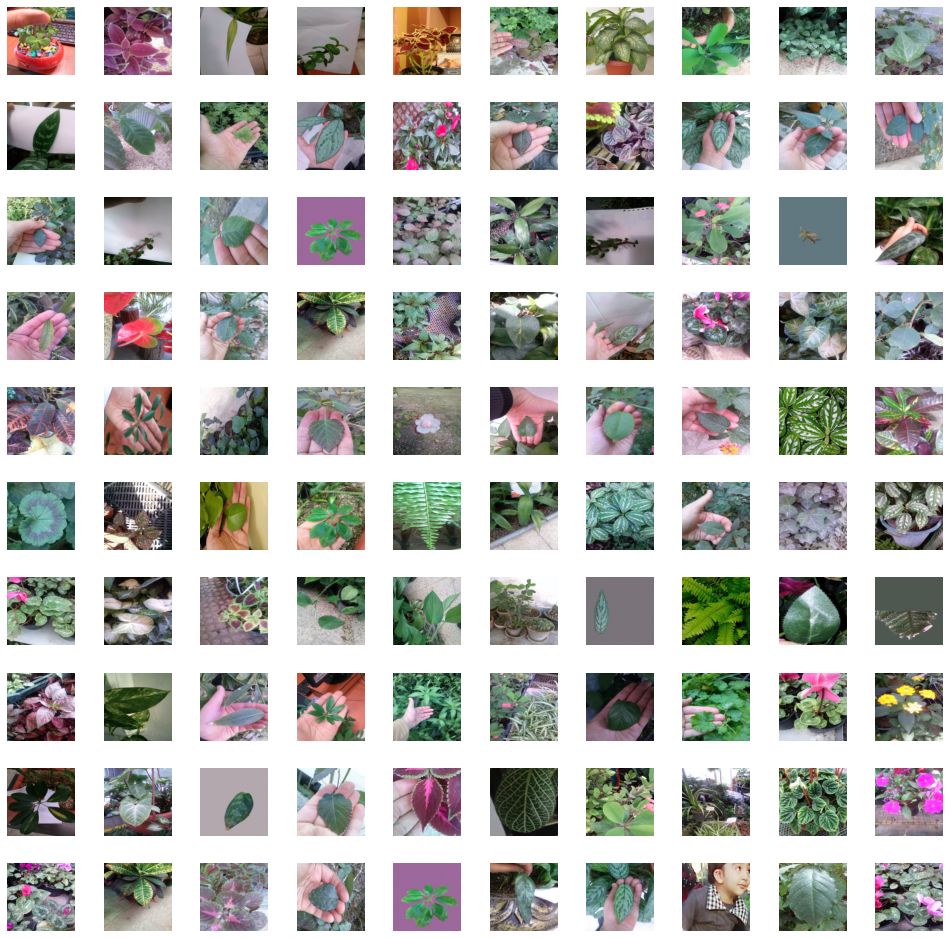

In [12]:
labels = np.unique(data["class"])
W_grid = 10
L_grid = 10


fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() 

n_train = len(X) 

for i in np.arange(0, W_grid * L_grid): 

    index = np.random.randint(0, n_train)
    axes[i].imshow(X[index].reshape(120, 120, 3))
    label_index = data.loc[i, "class"]
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

Text(0.5, 1.0, 'Class distribution in training set')

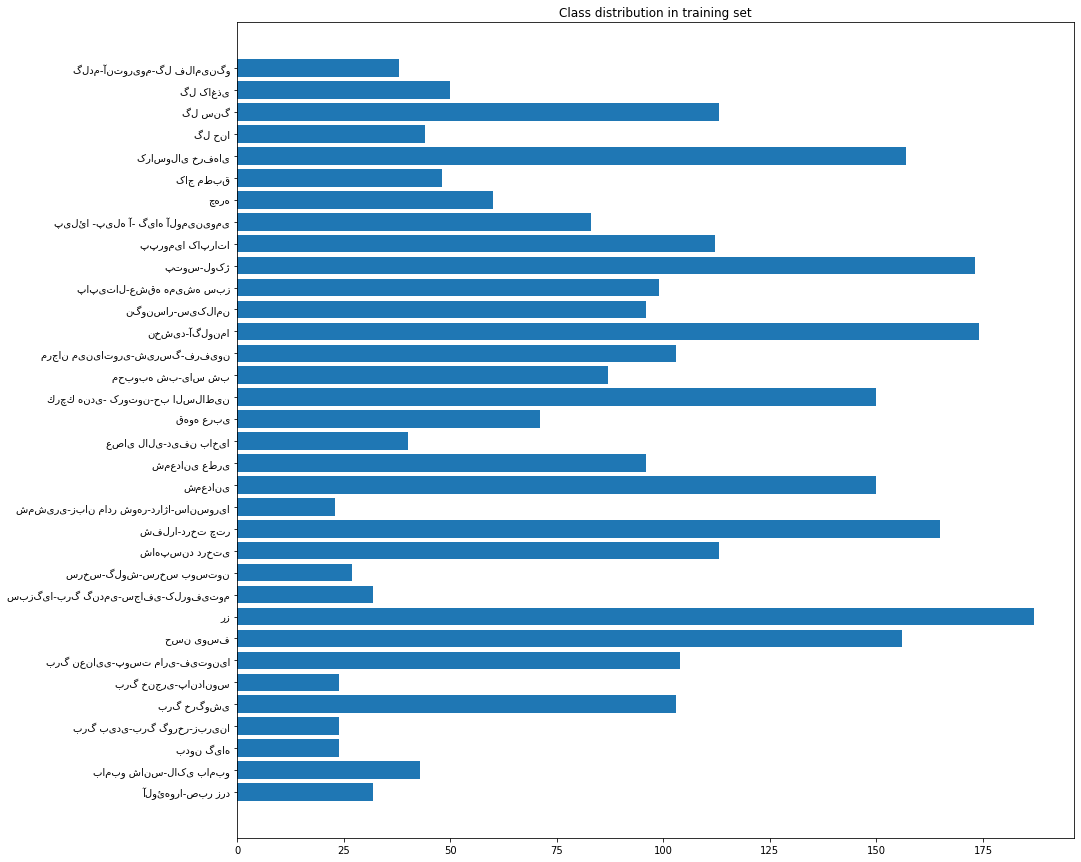

In [14]:
classes, counts = np.unique(data["class"], return_counts=True)
plt.figure(figsize = (15, 15))
plt.barh(labels, counts)
plt.title('Class distribution in training set')

# Train & Test data

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 41)
print(f"train_size = {y_train.shape} & test size = {y_test.shape}")

train_size = (2400, 34) & test size = (601, 34)


In [16]:
def plot_history(history, title):
    
    plt.figure(figsize=(15,7))
    # Plot training & validation accuracy values
    plt.subplot(121)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(122)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

In [17]:
def evaluation_model(model, X_train, X_test, y_train, y_test):
  predictions = model.predict(X_test)
  predict_class = np.argmax(predictions, axis=1)
  predict_class = predict_class.tolist()
  predict_class = np.array(predict_class)
  y_test = y_test.reshape(1, -1)[0]
    
  miss_x_test = []
  miss_y_test = []
  for i in range(y_test.shape[0]):
    if y_test[i] != predict_class[i]:
      miss_x_test.append(X_test[i])
      miss_y_test.append((y_test[i], predict_class[i]))
  
  
  predictions = model.predict(X_train)
  predict_class = np.argmax(predictions, axis=1)
  predict_class = predict_class.tolist()
  predict_class = np.array(predict_class)
  y_train = y_train.reshape(1, -1)[0]
  
  miss_x_train = []
  miss_y_train = []
  for i in range(y_test.shape[0]):
    if y_train[i] != predict_class[i]:
      miss_x_train.append(X_train[i])
      miss_y_train.append((y_train[i], predict_class[i]))

  miss_count_per_class_train = {label:0 for label in labels}
  for miss in miss_y_train:
    miss_count_per_class_train[labels[miss[0]]] += 1

  print (miss_count_per_class_train)
  miss_count_per_class_test = {label:0 for label in labels}
  for miss in miss_y_test:
    miss_count_per_class_test[labels[miss[0]]] += 1
  
  return (miss_count_per_class_train, miss_count_per_class_test) , ((miss_x_train, miss_y_train), (miss_x_test, miss_y_test))

def miss_plot(miss1, miss2):
    plt.figure(figsize=(15,7))

    data = miss1
    names = list(data.keys())
    values = list(data.values())
    X_axis = np.arange(len(data))
    plt.bar(X_axis + 0.2, values,0.4, tick_label=names, label = "train data")
    
    data = miss2
    names = list(data.keys())
    values = list(data.values())

    X_axis = np.arange(len(data))
    plt.bar(X_axis - 0.2, values,0.4,  tick_label=names, label = "test data")
    
    plt.xticks(X_axis, names)
    plt.xlabel("Groups")
    plt.ylabel("Number of miss classification")
    plt.title("Number of miss classification in each group")
    plt.legend()
    
    plt.show()

# DenseNet121 Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.densenet import DenseNet121

In [ ]:
model = Sequential()
base_model = DenseNet121(input_shape=(120, 120, 3), include_top=False, weights='imagenet', pooling='avg')
model.add(base_model)
model.add(Dense(256, activation='relu'))
model.add(Dense(34, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])



In [ ]:
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True,rotation_range=20)
it_train = datagen.flow(X_train.reshape(X_train.shape[0], 120, 120, 3),y_train)
steps = int(X_train.shape[0] / 64)
history6=model.fit_generator(it_train,epochs=200,  steps_per_epoch=steps,validation_data=(X_test.reshape(X_test.shape[0], 120, 120, 3),y_test))

37/37 [==============================] - 8s 220ms/step - loss: 0.0643 - accuracy: 0.9856 - val_loss: 2.1346 - val_accuracy: 0.7654
Epoch 191/200
37/37 [==============================] - 7s 183ms/step - loss: 0.0637 - accuracy: 0.9848 - val_loss: 2.6716 - val_accuracy: 0.7837
Epoch 192/200
37/37 [==============================] - 8s 213ms/step - loss: 0.0615 - accuracy: 0.9823 - val_loss: 2.2648 - val_accuracy: 0.7770
Epoch 193/200
37/37 [==============================] - 8s 212ms/step - loss: 0.0618 - accuracy: 0.9823 - val_loss: 2.4620 - val_accuracy: 0.7088
Epoch 194/200
37/37 [==============================] - 7s 181ms/step - loss: 0.1437 - accuracy: 0.9696 - val_loss: 3.6959 - val_accuracy: 0.7271
Epoch 195/200
37/37 [==============================] - 7s 180ms/step - loss: 0.0694 - accuracy: 0.9797 - val_loss: 1.9552 - val_accuracy: 0.7671
Epoch 196/200
37/37 [==============================] - 7s 190ms/step - loss: 0.0828 - accuracy: 0.9772 - val_loss: 2.2101 - val_accuracy: 0.7937

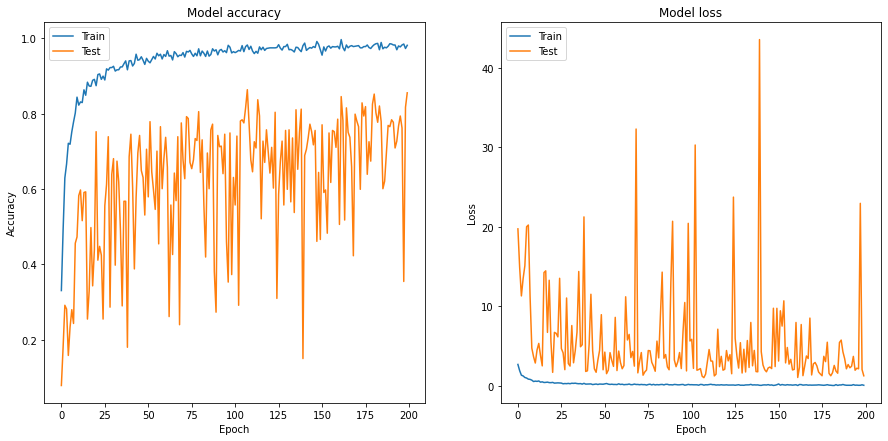

In [ ]:
plot_history(history6, "DenseNet History")

In [ ]:
evaluation_model(model, X_train.reshape(X_train.shape[0], 120, 120, 3), X_test.reshape(X_test.shape[0], 120, 120, 3), y_train, y_test)

NameError: ignored